# Data Mining Association Analysis with Apriori, Eclat, and FP-Growth

##Introduction:

Welcome to this Jupyter Notebook where we embark on an exploration of Association Analysis, a powerful technique in data mining that uncovers interesting relationships and associations within datasets. In this notebook, our focus is on three well-known algorithms: Apriori, Eclat, and FP-Growth.

##Objective:
The primary objective of this analysis is to showcase the efficiency and unique characteristics of various Association Analysis methods in discovering frequent itemsets and generating valuable association rules. By doing so, we aim to unravel hidden patterns, dependencies, and insights that can drive decision-making processes.

##Methods:

- Apriori Algorithm: We begin our journey with the classic Apriori algorithm, a seminal method in Association Analysis. Apriori employs a breadth-first search strategy to discover frequent itemsets and generate association rules based on user-defined support and confidence thresholds.

- Eclat Algorithm: Next, we explore the Eclat algorithm, an alternative approach to Apriori that uses a depth-first search strategy. Eclat efficiently discovers frequent itemsets by employing a vertical database layout and avoids candidate generation.

- FP-Growth Algorithm: Finally, we delve into the FP-Growth algorithm, a tree-based method that constructs a frequent pattern tree to efficiently mine frequent itemsets. FP-Growth stands out for its ability to handle large datasets with reduced computational cost.

##Model Explanation:

- Apriori Model: Apriori uses a two-step process. First, it identifies all frequent itemsets by iteratively discovering and eliminating infrequent itemsets. Second, it generates association rules based on user-specified thresholds, considering both support and confidence.

- Eclat Model: Eclat employs a depth-first search to find frequent itemsets. It utilizes a vertical database layout, counting the occurrence of itemsets by intersecting transactions, and avoids generating candidate itemsets, making it computationally efficient.

- FP-Growth Model: FP-Growth constructs a frequent pattern tree, which compactly represents the dataset's frequent itemsets. It efficiently mines these itemsets by recursively dividing and conquering the dataset, resulting in faster execution compared to Apriori.



In [ ]:
import pandas as pd                                   # For dataframes
import matplotlib.pyplot as plt                       # For plotting data
from apyori import apriori                            # For Apriori algorithm
from pyECLAT import ECLAT                             # For ECLAT Algorithm
from mlxtend.preprocessing import TransactionEncoder  # For FP-tree algorithm
from mlxtend.frequent_patterns import fpgrowth        # For FP-tree algorithm

# LOAD AND PREPARE DATA
For this demonstration, we'll use the dataset `Groceries.csv`, which comes from the R package `arules` and is saved as a CSV file. The data is in transactional format (as opposed to tabular format), which means that each row is a list of items purchased together and that the items may be in different order. There are 32 columns in each row, each column either contains a purchased items or `NaN`.

## Data Source

Michael Hahsler, Kurt Hornik, and Thomas Reutterer (2006). Implications of probabilistic data modeling for mining association rules. In M. Spiliopoulou, R. Kruse, C. Borgelt, A. Nuernberger, and W. Gaul, editors, _From Data and Information Analysis to Knowledge Engineering, Studies in Classification, Data Analysis, and Knowledge Organization_, pages 598–605. Springer-Verlag.



## Import Data

- Read the dataset from the local CSV file and display the data.

In [ ]:
df=pd.read_csv('/content/Groceries.csv', header=None)

# ASSOCIATION ANALYSIS WITH APRIORI
For this demonstration, we'll use the dataset `Groceries.csv`, which comes from the R package `arules` and is saved as a CSV file. The data is in transactional format (as opposed to tabular format), which means that each row is a list of items purchased together and that the items may be in different order. There are 32 columns in each row, each column either contains a purchased items or `NaN`.

The code below opens the dataset and converts to to list format, which is necessary for the `apriori()` function.

In [ ]:
transactions = []

with open('/content/Groceries.csv') as f:
    for line in f:
        transaction = [item for item in line.strip().split(',') if item != 'NaN']
        transactions.append(transaction)

transactions[:3]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk']]

In [ ]:
rules = list(apriori(
    transactions,
    min_support=0.001,
    min_confidence=0.10,
    min_length=2,
    max_length=2))

# Prints one rule
print(rules[0])

RelationRecord(items=frozenset({'bottled water'}), support=0.11052364006100661, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'bottled water'}), confidence=0.11052364006100661, lift=1.0)])


In [ ]:
rules_df = pd.DataFrame(
    [{'From': list(rule[0])[0],
    'To': list(rule[0])[1],
    'Support': rule[1],
    'Confidence': rule[2][0][2],
    'Lift': rule[2][0][3]} for rule in rules if len(rule[0]) == 2])
rules_df = rules_df.dropna()

rules_df.head()

,From,To,Support,Confidence,Lift
0,Instant food products,bottled water,0.001017,0.126582,1.145296
1,butter,Instant food products,0.001220,0.151899,2.741145
2,Instant food products,citrus fruit,0.001118,0.139241,1.682347
3,Instant food products,curd,0.001322,0.164557,3.088583
4,Instant food products,domestic eggs,0.001017,0.126582,1.995091


## Convert Rules to Readable Format
The printed rule above is not very clear. Let's convert it to a more readable format. We'll add a `From` and `To` field to the DataFrame, to indicate a rule's antecedent and consequent respectively. Hence for a rule of the form `A->B`. The `From` will contain `A` and `To` will contain `B`. We'll also add the `Support`, `Confidence` and `Lift` corresponding to each rule in the DataFrame.

                    From                To   Support  Confidence      Lift  \
1539    other vegetables        whole milk  0.074835    0.386758  1.513634   
1744          rolls/buns        whole milk  0.056634    0.307905  1.205032   
1929          whole milk            yogurt  0.056024    0.219260  1.571735   
1769     root vegetables        whole milk  0.048907    0.448694  1.756031   
1506     root vegetables  other vegetables  0.047382    0.244877  2.246605   
1540    other vegetables            yogurt  0.043416    0.224383  1.608457   
1505    other vegetables        rolls/buns  0.042603    0.220179  1.197047   
1911      tropical fruit        whole milk  0.042298    0.403101  1.577595   
1864                soda        whole milk  0.040061    0.229738  0.899112   
1725                soda        rolls/buns  0.038332    0.208402  1.195124   
1532    other vegetables    tropical fruit  0.035892    0.185497  1.767790   
1745          rolls/buns            yogurt  0.034367    0.186844

<ipython-input-13-3172f3d1acea>:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))


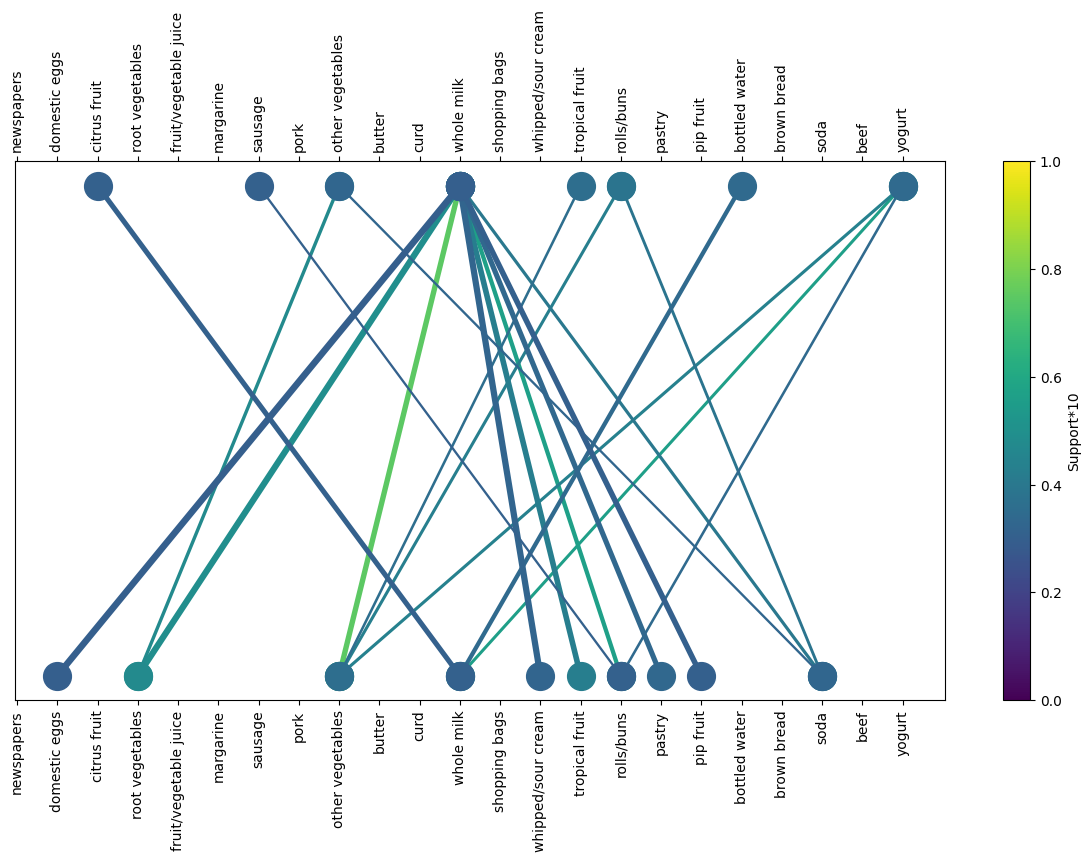

In [ ]:
# Pick top rules
rules_df = rules_df.sort_values('Support', ascending=False).head(50)

# List of all items
items = set(rules_df['From']) | set(rules_df['To'])

# Creates a mapping of items to numbers
imap = {item : i for i, item in enumerate(items)}

# Maps the items to numbers and adds the numeric 'FromN' and 'ToN' columns
rules_df['FromN'] = rules_df['From'].map(imap)
rules_df['ToN'] = rules_df['To'].map(imap)

# Displays the top 20 association rules, sorted by Support
print(rules_df.head(20))


# Sets the size of the plot
fig = plt.figure(figsize=(15, 7))

# Draws a line between items for each rule
# Colors each line according to the support of the rule
for index, row in rules_df.head(20).iterrows():
    plt.plot([row['FromN'], row['ToN']], [0, 1], 'o-',
             c=plt.cm.viridis(row['Support'] * 10),
             markersize=20,
             lw=row['Confidence'] * 10)

# Adds a colorbar and its title
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cb.set_label('Support*10')

# Adds labels to xticks and removes yticks
plt.xticks(range(len(items)), items, rotation='vertical')
plt.yticks([])
plt.show()

# ASSOCIATION ANALYSIS WITH ECLAT

### APPLY ECLAT

Call `ECLAT()` on `transactions_df` to fit a model. For parameters, `ECLAT.fit()` can take the minimum support, minimum confidence, minimum lift, and minimum items in a transaction. Only the pairs of items that satisfy these criteria will be returned.

As a note, increasing the number for `max_combination` will dramatically increase the processing time. With a value of 2, processing takes a few seconds; with a value of 3, processing takes minutes.

In [ ]:
eclat_instance = ECLAT(data=df, verbose=True)

_, supports = eclat_instance.fit(
    min_support=0.03,
    min_combination=2,
    max_combination=2,
    separator=' & ',
    verbose=True)

supports

100%|██████████| 169/169 [00:00<00:00, 1241.23it/s]


Combination 2 by 2


946it [00:09, 102.56it/s]


{'tropical fruit & whole milk': 0.04229791560752415,
 'tropical fruit & other vegetables': 0.035892221657346214,
 'pip fruit & whole milk': 0.030096593797661414,
 'bottled water & whole milk': 0.03436705643111337,
 'pastry & whole milk': 0.033248601931875954,
 'sausage & rolls/buns': 0.030604982206405694,
 'citrus fruit & whole milk': 0.030503304524656837,
 'root vegetables & whole milk': 0.048906964921199794,
 'root vegetables & other vegetables': 0.047381799694966954,
 'soda & whole milk': 0.040061006609049314,
 'soda & other vegetables': 0.032740213523131674,
 'soda & rolls/buns': 0.03833248601931876,
 'whole milk & other vegetables': 0.07483477376715811,
 'whole milk & whipped/sour cream': 0.032231825114387394,
 'whole milk & rolls/buns': 0.05663446873411286,
 'whole milk & yogurt': 0.05602440264361973,
 'other vegetables & rolls/buns': 0.042602948652770714,
 'other vegetables & yogurt': 0.04341637010676157,
 'rolls/buns & yogurt': 0.03436705643111337}

## Convert Rules to Readable Format

This code takes the rules above and formats them in a table format that is easier to read and modify.

In [ ]:
rows = []

for rule, support in supports.items():
    from_, to = rule.split(' & ')
    rows.append({
        'From': from_,
        'To': to,
        'Support': support
    })

rules_df = pd.DataFrame(rows)

rules_df.head()

,From,To,Support
0,tropical fruit,whole milk,0.042298
1,tropical fruit,other vegetables,0.035892
2,pip fruit,whole milk,0.030097
3,bottled water,whole milk,0.034367
4,pastry,whole milk,0.033249


## Plot Association/
Plot each pair of items in the rule. If a rule is A->B, then the item A is in the bottom row of the plot (y=0) and B is in the top row (y=1). The color of each line indicates the support of the rule multiplied by 100 (support*100). The width of each line is controlled by the confidence of each rule.

                From                  To   Support  FromN  ToN
12        whole milk    other vegetables  0.074835      0    6
14        whole milk          rolls/buns  0.056634      0    4
15        whole milk              yogurt  0.056024      0    7
7    root vegetables          whole milk  0.048907      2    0
8    root vegetables    other vegetables  0.047382      2    6
17  other vegetables              yogurt  0.043416      6    7
16  other vegetables          rolls/buns  0.042603      6    4
0     tropical fruit          whole milk  0.042298      3    0
9               soda          whole milk  0.040061     11    0
11              soda          rolls/buns  0.038332     11    4
1     tropical fruit    other vegetables  0.035892      3    6
3      bottled water          whole milk  0.034367     10    0
18        rolls/buns              yogurt  0.034367      4    7
4             pastry          whole milk  0.033249      8    0
10              soda    other vegetables  0.032740     

<ipython-input-22-15738acd940b>:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))


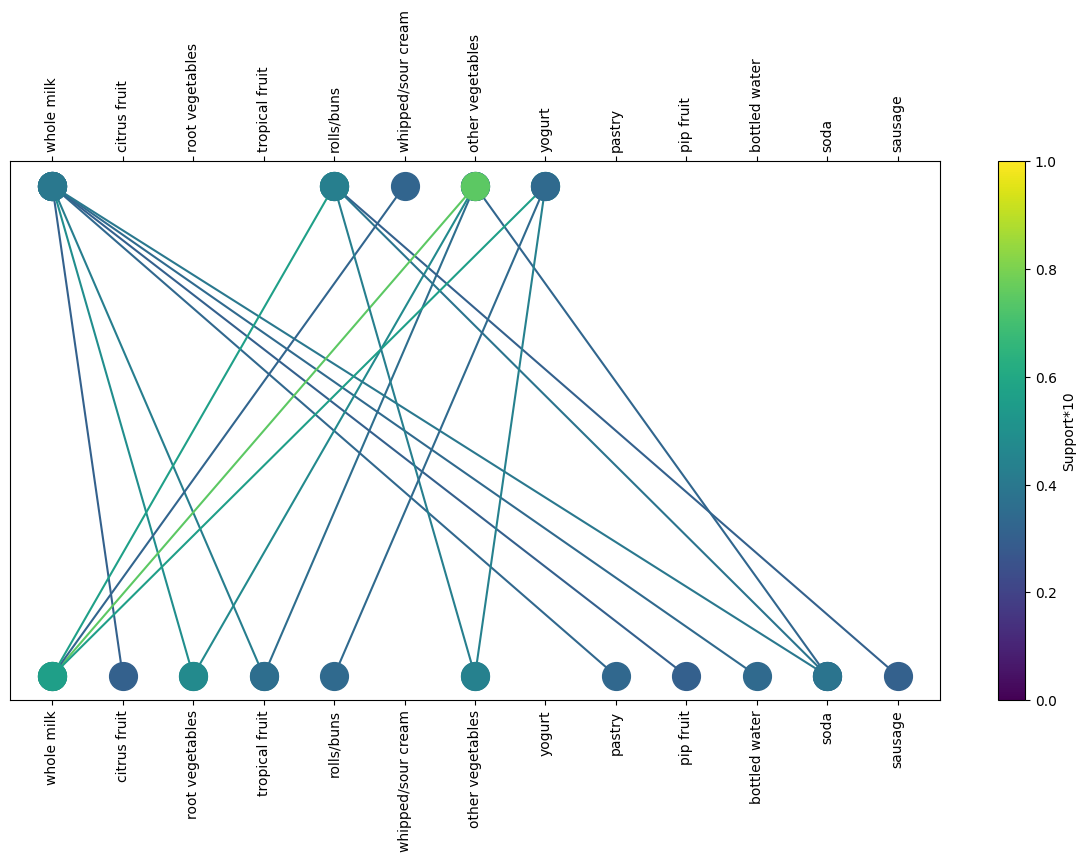

In [ ]:
# List of all items
items = set(rules_df['From']) | set(rules_df['To'])

# Creates a mapping of items to numbers
imap = {item : i for i, item in enumerate(items)}

# Maps the items to numbers and adds the numeric 'FromN' and 'ToN' columns
rules_df['FromN'] = rules_df['From'].map(imap)
rules_df['ToN'] = rules_df['To'].map(imap)

# Displays the top 20 association rules, sorted by Support
print(rules_df.head(20).sort_values(by='Support', ascending=False))


# Adds ticks to the top of the graph also
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

# Sets the size of the plot
fig = plt.figure(figsize=(15, 7))

# Draws a line between items for each rule
# Colors each line according to the support of the rule
for index, row in rules_df.iterrows():
    plt.plot([row['FromN'], row['ToN']], [0, 1], 'o-',
             c=plt.cm.viridis(row['Support'] * 10),
             markersize=20)

# Adds a colorbar and its title
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cb.set_label('Support*10')

# Adds labels to xticks and removes yticks
plt.xticks(range(len(items)), items, rotation='vertical')
plt.yticks([])
plt.show()

# ASSOCIATION ANALYSIS WITH FP-GROWTH

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Build FP MODEL

- Call `fpgrowth()` on `transactions`.
- As parameters `fpgrowth()` can take the minimum support ratio and minimum confidence.
- Only the pairs of items that satisfy these criteria would be returned.

In [ ]:
rules_df = fpgrowth(df, min_support=0.01, use_colnames=True, max_len=2, verbose=False)

rules_df = rules_df[rules_df.itemsets.map(len) == 2]
rules_df['From'] = rules_df['itemsets'].map(lambda x: list(x)[0])
rules_df['To'] = rules_df['itemsets'].map(lambda x: list(x)[1])
rules_df['N'] = (rules_df['support'] * len(transactions)).astype(int)

rules_df.sort_values('N', ascending=False, inplace=True)

rules_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,From,To,N
132,0.074835,"(other vegetables, whole milk)",other vegetables,whole milk,736
142,0.056634,"(rolls/buns, whole milk)",rolls/buns,whole milk,557
104,0.056024,"(whole milk, yogurt)",whole milk,yogurt,551
219,0.048907,"(root vegetables, whole milk)",root vegetables,whole milk,481
217,0.047382,"(root vegetables, other vegetables)",root vegetables,other vegetables,466


## Plot
Plot each pair of items in the rule. If a rule is A->B, then the item A is in the bottom row of the plot (y=0) and B is in the top row (y=1). The color of each line indicates the support of the rule multiplied by 10 (support*10).

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      support                             itemsets                From  \
132  0.074835       (other vegetables, whole milk)    other vegetables   
142  0.056634             (rolls/buns, whole milk)          rolls/buns   
104  0.056024                 (whole milk, yogurt)          whole milk   
219  0.048907        (root vegetables, whole milk)     root vegetables   
217  0.047382  (root vegetables, other vegetables)     root vegetables   
107  0.043416           (other vegetables, yogurt)    other vegetables   
141  0.042603       (other vegetables, rolls/buns)    other vegetables   
111  0.042298         (tropical fruit, whole milk)      tropical fruit   
173  0.040061                   (soda, whole milk)                soda   
172  0.038332                   (soda, rolls/buns)                soda   
109  0.035892   (tropical fruit, other vegetables)      tropical fruit   
149  0.034367          (whole milk, bottled water)          whole milk   
106  0.034367                 (rolls/b

<ipython-input-28-d7d829bd6ab0>:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))


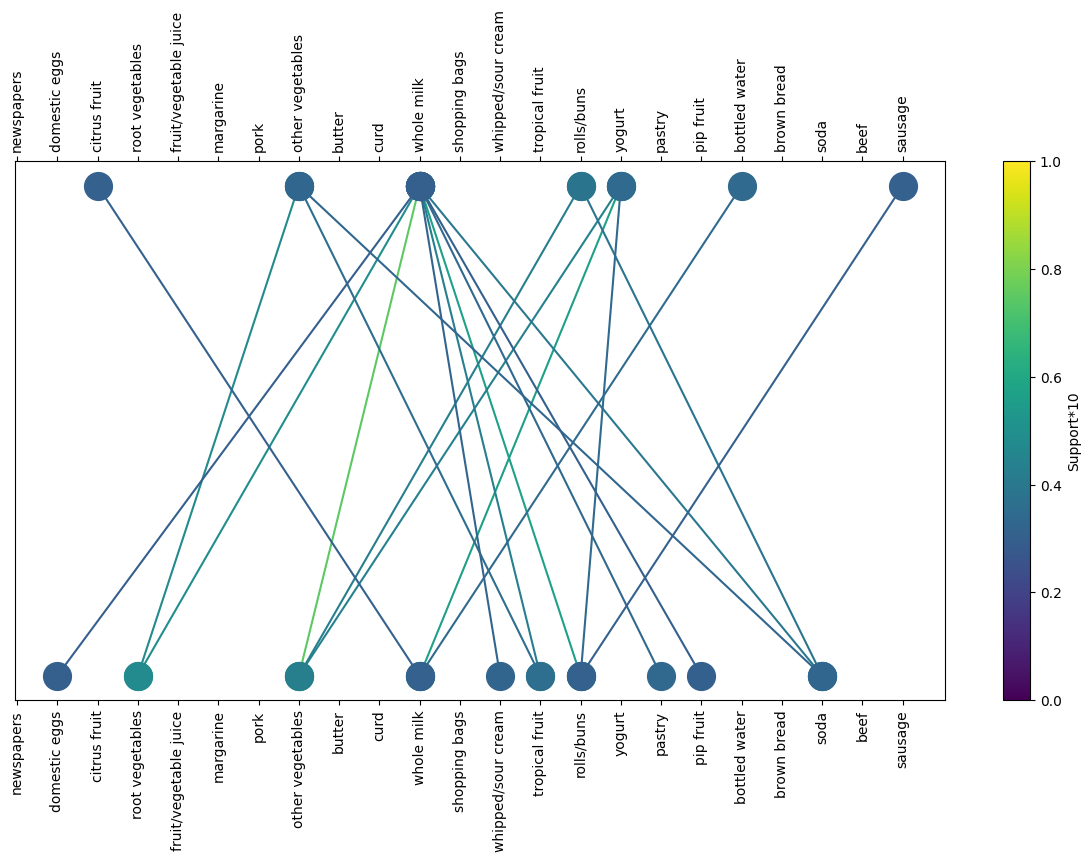

In [ ]:
# Pick top rules
rules_df = rules_df.sort_values('N', ascending=False).head(50)

# List of all items
items = set(rules_df['From']) | set(rules_df['To'])

# Creates a mapping of items to numbers
imap = {item : i for i, item in enumerate(items)}

# Maps the items to numbers and adds the numeric 'FromN' and 'ToN' columns
rules_df['FromN'] = rules_df['From'].map(imap)
rules_df['ToN'] = rules_df['To'].map(imap)

# Displays the top 20 association rules, sorted by Support
print(rules_df.head(20))


# Adds ticks to the top of the graph also
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

# Sets the size of the plot
fig = plt.figure(figsize=(15, 7))

# Draws a line between items for each rule
# Colors each line according to the support of the rule
for index, row in rules_df.head(20).iterrows():
    plt.plot([row['FromN'], row['ToN']], [0, 1], 'o-',
             c=plt.cm.viridis(row['support'] * 10),
             markersize=20)

# Adds a colorbar and its title
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cb.set_label('Support*10')

# Adds labels to xticks and removes yticks
plt.xticks(range(len(items)), items, rotation='vertical')
plt.yticks([])
plt.show()